# **Лабораторная работа № 8.**
### по курсу «Нейроинформатика»
## **Тема: Динамические сети**



> Студент: Овечкин В.А.

> Группа: М8О-408Б-18

> Преподаватель: Аносова Н.П.

> Оценка:

## **Цель работы**: 
Исследование свойств некоторых динамических нейронных сетей,
алгоритмов обучения, а также применение сетей в задачах аппроксимации функций и распознавания динамических образов.


## **Постановка задачи:**

1. Использовать сеть прямого распространения с запаздыванием для предсказания значений
временного ряда и выполнения многошагового прогноза.
2. Использовать сеть сеть прямого распространения с распределенным запаздыванием для
распознавания динамических образов.
3. Использовать нелинейную авторегрессионную сеть с внешними входами для аппроксимации траектории динамической системы и выполнения многошагового прогноза.


## **Вариант** :
Для этапа 1 

10/1889

Для этапа 3

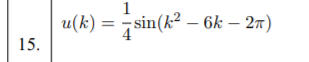

###Теория
*Сеть прямого распространения с запаздыванием*: схожа с адаптивным фильтром, но отличается тем, что имеет 2 полоносвязных слоя вместо 1 в адаптивном фильтраторе, что даёт ей возможность быть более гибкой. Такая сеть позволяет решать задачи динамических процессов(распознавание аудио или видео потока).


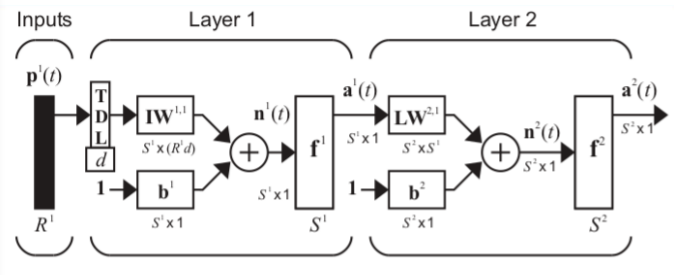

*Сеть прямого распространения с распределенным запаздыванием*: в отличие от сети прямого распространения с запаздыванием имеет TDL блок не только перед первым слоем, но и перед вторым. Благодаря этому применима в задачах классификации изображений или частотно-временных паттернов.

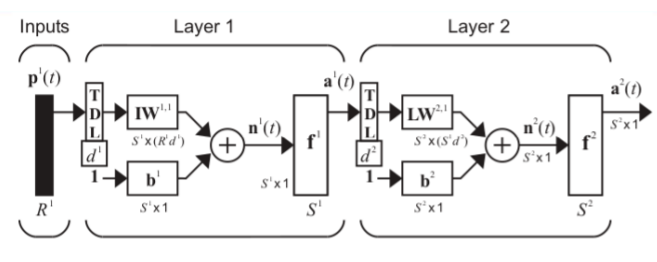

*Нелинейная авторегрессионная сеть с внешними входами(NARX)*: Отличается от сети прямого распространения с запаздыванием тем, что выход первого слоя формируется не только из умножения матрицы весов на входные значения, но и умножение другой матрицы весов на выход нейросети. Эта структура позволяет адаптироваться за счет известных значений момента и значений предсказанных сетью ранее, что даёт возможность управлять динамическими системами, в которых нужна адаптация.

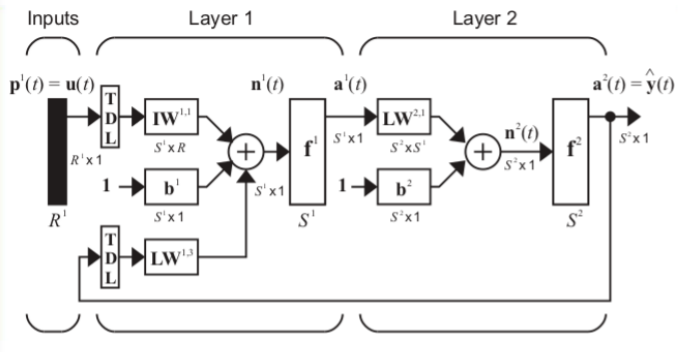

# Листинг кода

Число Вольфа - характерный показатель солнечной активности. Он задаёт количество пятен на солнце для данного момента времени. Для аппроксимации используем среднемесячные значения чисел Вольфа.

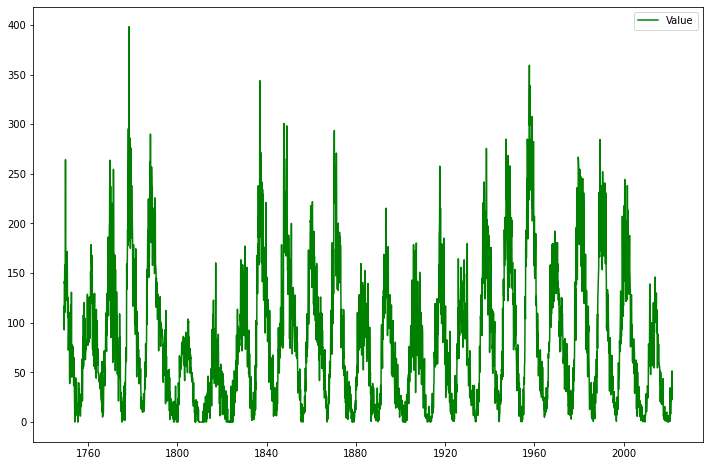

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data, color = 'g', label="Value")
plt.legend()
plt.show()

глубина погружения и вспомогательные данные

In [ ]:
date = "1889-10-01"

In [ ]:
D = 5
trainSize = 500
controlSize = 100
testSize = 50

сглаживаем траекторию с помощью усредняющего фильтра с шириной окна 12

In [ ]:
def smooth(a, windowWidth):
    out0 = np.convolve(a, np.ones(windowWidth, dtype=int), 'valid') / windowWidth    
    r = np.arange(1, windowWidth-1,2)
    start = np.cumsum(a[:(windowWidth-1)-1])[::2] / r
    stop = (np.cumsum(a[:-(windowWidth-1):-1])[::2] / r)[::-1]
    return np.concatenate((start, out0, stop))

In [ ]:
values = data.values.flatten()
smoothValues = smooth(values, 12)

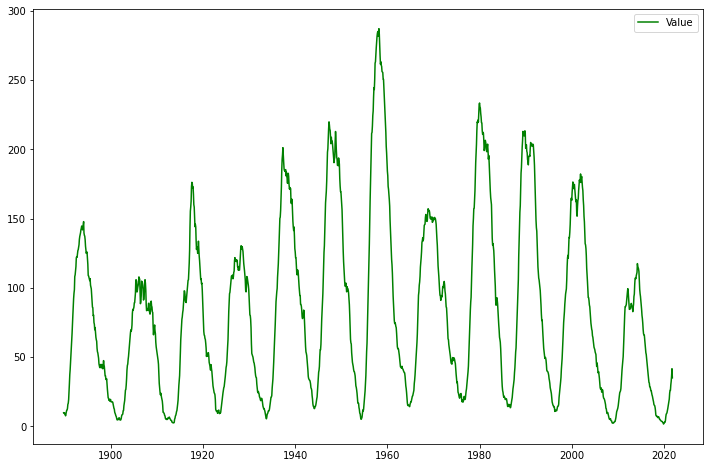

In [ ]:
shiftValue = data.values.size - smoothValues.size
data.iloc[shiftValue:] = smoothValues[:, np.newaxis]

data = data[data.index >= pd.to_datetime(date)]
plt.figure(figsize=(12, 8))
plt.plot(data, color = 'g', label="Value")
plt.legend()
plt.show()

Формируем обучающее и тестовое множество с задержками

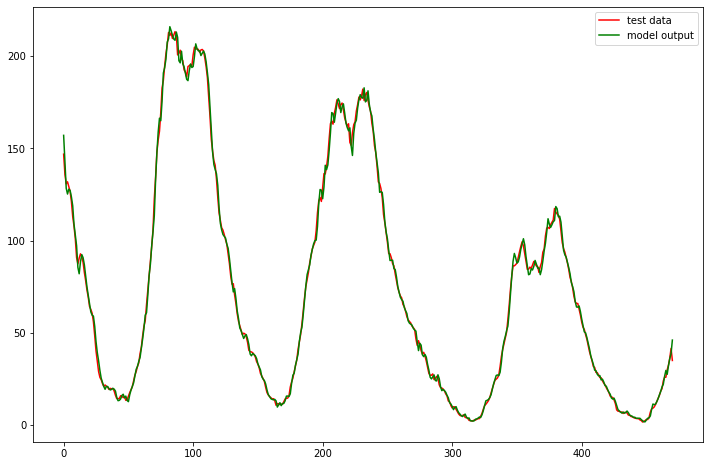

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(yTest, color='red')
plt.plot(predictTest, color='green')
plt.legend(['test data', 'model output'])
plt.show()

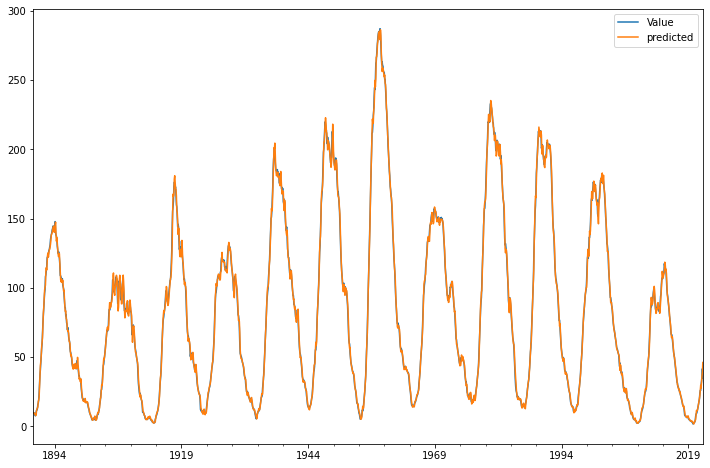

In [ ]:
data.plot()

сгенерируем набор точек

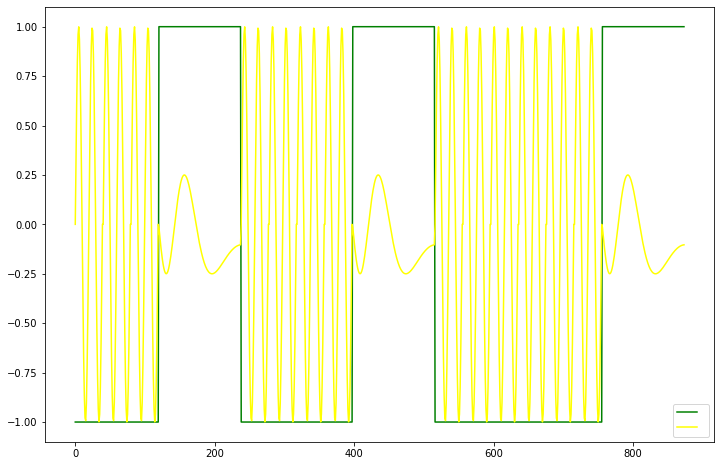

In [ ]:
plt.plot(T, color='green')
plt.plot(P, color='yellow')
plt.legend(['', ''])
plt.show()

создадим и обучим сеть с задержками равными 5

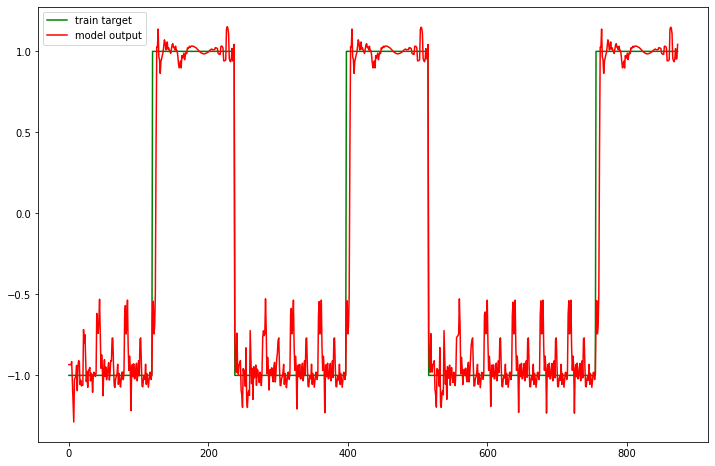

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(T, color='green')
plt.plot(output, color='red')
plt.legend(['train target', 'model output'])
plt.show()

In [ ]:
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 0.06864988558352403
RMSE = 0.26201123178887586


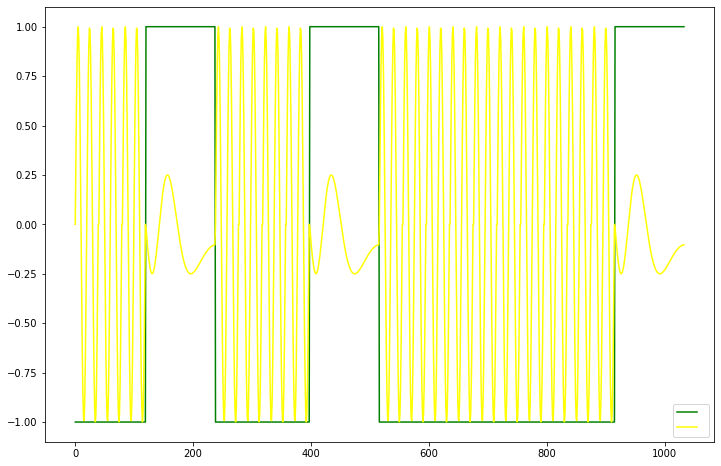

In [ ]:
plt.plot(T2, color='green')
plt.plot(P2, color='yellow')
plt.legend(['', ''])
plt.show()

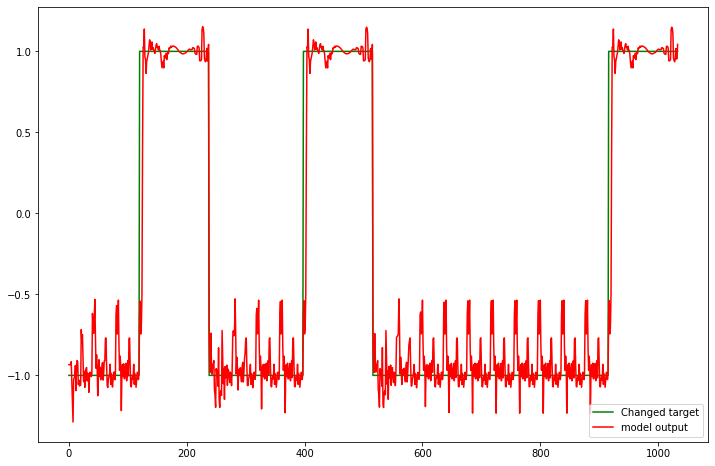

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(T2, color='green')
plt.plot(output2, color='red')
plt.legend(['Changed target', 'model output'])
plt.show()

In [ ]:
output2[output2 >= 0] = 1.0
output2[output2 < 0] = -1.0

MSE = mean_squared_error(T2, output2)
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 0.058027079303675046
RMSE = 0.24088810535946983


Формируем входные данные

In [ ]:
output[np.isnan(output)] = 0
MSE = mean_squared_error(target, output)

print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 2.3576027723162086e-05
RMSE = 0.004855515186173563


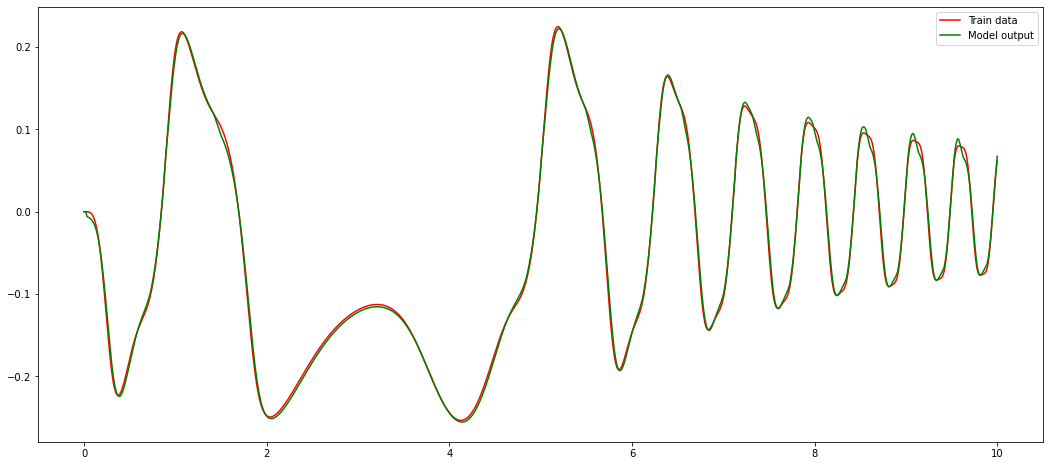

In [ ]:
plt.figure(figsize=(18, 8))

plt.plot(k, y, color='red')
plt.plot(k, output, color='green')
plt.legend(['Train data', 'Model output'])
plt.show()

In [ ]:
output[np.isnan(output)] = 0
MSE = mean_squared_error(target, output)

print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 0.0004077350725238321
RMSE = 0.020192450879569626


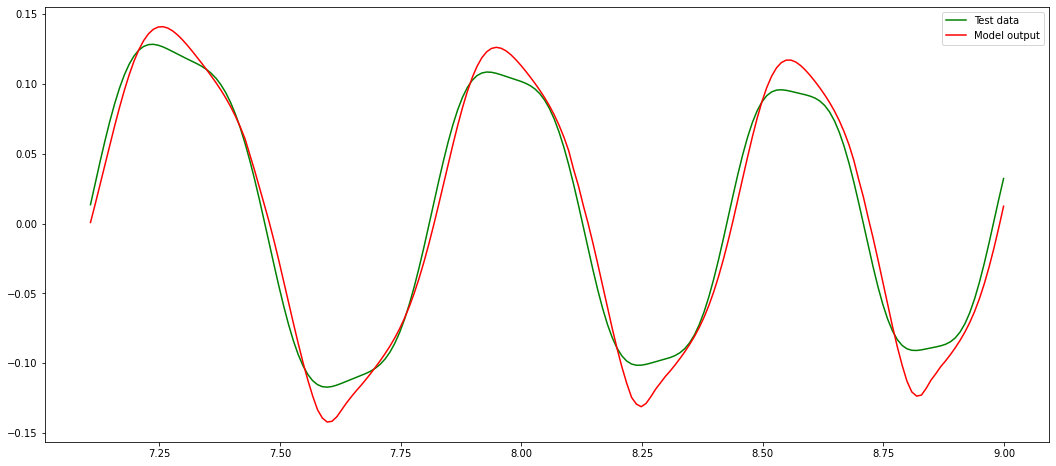

In [ ]:
plt.figure(figsize=(18, 8))

plt.plot(xTest[shift:], yTest[shift:], color='green')
plt.plot(xTest[shift:], output[shift:], color = 'red')
plt.legend(['Test data', 'Model output'])
plt.show()

#Вывод
Я познакомился с динамическими сетями, научился применять динамические сети в задачах аппроксимации функций и распознавания динамических образов. Эти сети хорошо справляются с задачей и имеют применение в обработке звука или видео, в распознавании речи или классификации изображений и частотнозвременных паттернов.